In [1]:
import numpy as np
from scipy import stats, integrate
import matplotlib.pyplot as plt
%matplotlib inline

## References 

 - https://math.stackexchange.com/questions/3152412/use-monte-carlo-stimulation-to-estimate-mixture-distributions
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html
 - https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html#building-specific-distributions
 - https://wiki.analytica.com/index.php?title=Mixture_distribution
 - https://github.com/scipy/scipy/blob/v1.2.1/scipy/stats/_distn_infrastructure.py#L948
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_histogram.html
 
## Checks

 - https://www.wolframalpha.com/input/?i=int(1%2Fx,x%3D1..e)
 - https://www.wolframalpha.com/input/?i=int((x%5E2*e%5Ex)%2F(e-2),x%3D0..1)

Suppose we have the following PDFs

$$f_1(x) = \frac{1}{x}$$

with support $[1,e]$, and

$$f_2(x) = \frac{x^2e^{x}}{e - 2}$$

with support $[0,1].$ Use Monte Carlo simulation and R to visually estimate the density of the mixture distribution defined by the PDF:

$$f(x) = 0.4f_1(x) + 0.6f_2(x)$$

In [2]:
def f1(x):
    return 1./x

In [3]:
C1 = [1, np.exp(1)]

In [4]:
def f2(x):
    return x**2*np.exp(x)/(np.exp(1) - 2)

In [5]:
C2 = [0, 1]

In [6]:
x = np.linspace(-0.25, 3, 250)

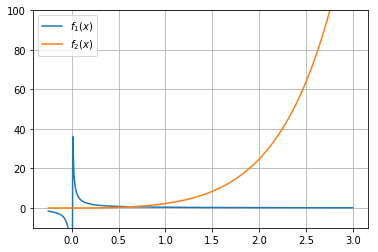

In [7]:
fig, axe = plt.subplots()
axe.plot(x, 0.4*f1(x), label='$f_1(x)$')
axe.plot(x, 0.6*f2(x), label='$f_2(x)$')
axe.set_ylim([-10, 100])
axe.legend()
axe.grid()

In [8]:
I1 = integrate.quad(f1, *C1)
I1

(0.9999999999999998, 1.1102230246251562e-14)

In [9]:
I2 = integrate.quad(f2, *C2)
I2

(1.0000000000000002, 1.1102230246251569e-14)

In [10]:
class rv1(stats.rv_continuous):
    """Home-made distribution"""
    def _pdf(self, x):
        return 1./x

In [11]:
class rv2(stats.rv_continuous):
    """Home-made distribution"""
    def _pdf(self, x):
        return x**2*np.exp(x)/(np.exp(1) - 2)

In [12]:
def mixture(X1, X2, B, n=100):
    b = B.rvs(size=n)
    x = np.empty(n)
    m = np.sum(b)
    x[b==0] = X1.rvs(size=n-m)
    x[b==1] = X2.rvs(size=m)
    return x

In [13]:
b = stats.bernoulli(p=0.6)

In [14]:
x1 = rv1(a=1, b=np.exp(1))
x2 = rv2(a=0, b=1)

In [15]:
xrv = mixture(x1, x2, b, n=50000)

In [16]:
kern = stats.gaussian_kde(xrv)

In [17]:
hist = np.histogram(xrv, bins=50)

In [18]:
xd = stats.rv_histogram(hist)

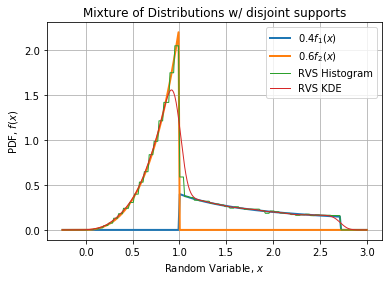

In [19]:
fig, axe = plt.subplots()
axe.plot(x, 0.4*x1.pdf(x), linewidth=2, label=r"$0.4 f_1(x)$")
axe.plot(x, 0.6*x2.pdf(x), linewidth=2, label=r"$0.6 f_2(x)$")
axe.plot(x, xd.pdf(x), linewidth=1, label='RVS Histogram')
axe.plot(x, kern.pdf(x), linewidth=1, label='RVS KDE')
axe.set_title("Mixture of Distributions w/ disjoint supports")
axe.set_xlabel("Random Variable, $x$")
axe.set_ylabel("PDF, $f(x)$")
axe.legend()
axe.grid()
fig.savefig("mixture.png", dpi=120)